In [1]:
# import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


In [2]:
# !pip install xgboost

In [3]:
data = pd.read_csv("data.csv")
data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.shape

(14204, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [6]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
data['Item_Weight'].mean()

12.792854228644284

In [8]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace = True)
data.isnull().sum()

C:\Users\shifa\AppData\Local\Temp\ipykernel_7452\2089056952.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace = True)


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
outlet_size = data.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x: x.mode()[0]))
print(outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [10]:
missing_values = data['Outlet_Size'].isnull()
print(missing_values)

0        False
1        False
2        False
3         True
4        False
         ...  
14199    False
14200    False
14201     True
14202     True
14203     True
Name: Outlet_Size, Length: 14204, dtype: bool


In [11]:
data.loc[missing_values, 'Outlet_Size'] = data.loc[missing_values, 'Outlet_Type'].apply(lambda x: outlet_size)
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,2099.333529
std,4.234226,0.051459,62.086938,8.371664,1542.432736
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027036,94.012000,1987.000000,878.856000
50%,12.792854,0.054021,142.247000,1999.000000,1828.273366
75%,16.000000,0.094037,185.855600,2004.000000,2949.298043
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
sns.set()

C:\Users\shifa\AppData\Local\Temp\ipykernel_7452\2467747235.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Weight'])


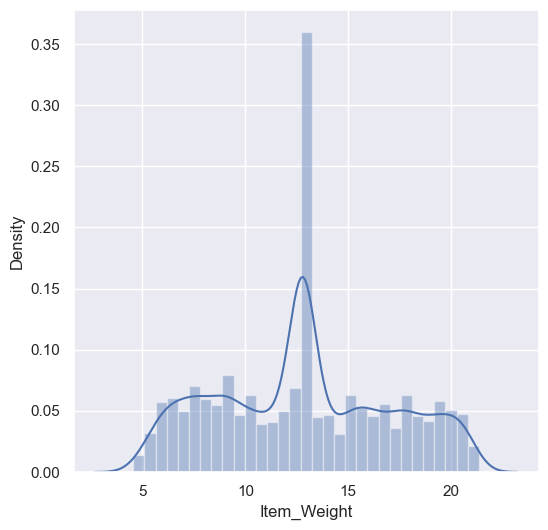

In [14]:
plt.figure(figsize= (6,6))
sns.distplot(data['Item_Weight'])
plt.show()

C:\Users\shifa\AppData\Local\Temp\ipykernel_7452\828136163.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Visibility'])


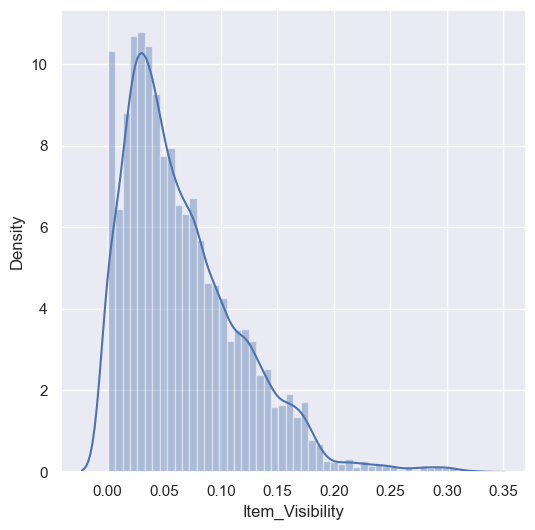

In [15]:
plt.figure(figsize= (6,6))
sns.distplot(data['Item_Visibility'])
plt.show()

C:\Users\shifa\AppData\Local\Temp\ipykernel_7452\3325910939.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_MRP'])


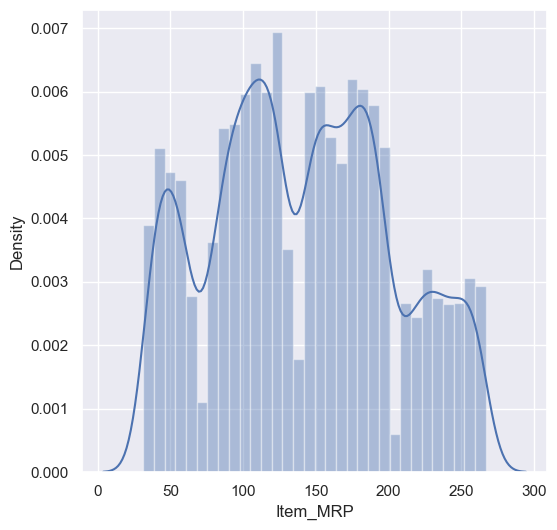

In [16]:
plt.figure(figsize= (6,6))
sns.distplot(data['Item_MRP'])
plt.show()

C:\Users\shifa\AppData\Local\Temp\ipykernel_7452\4129628159.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Outlet_Sales'])


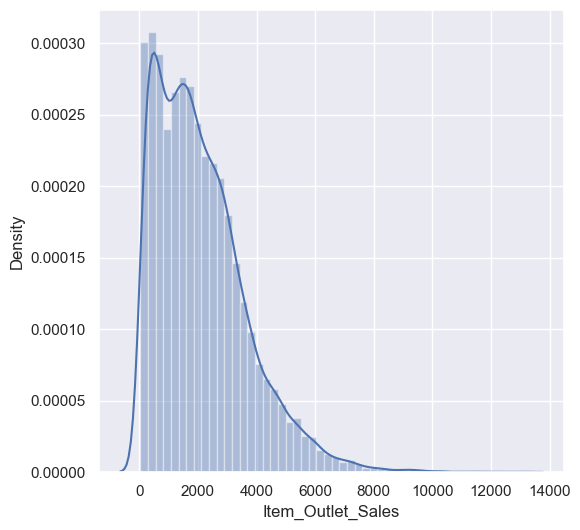

In [17]:
plt.figure(figsize= (6,6))
sns.distplot(data['Item_Outlet_Sales'])
plt.show()

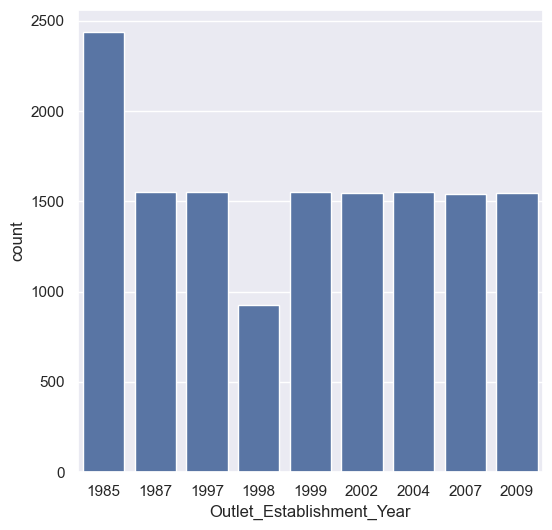

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=data)
plt.show()

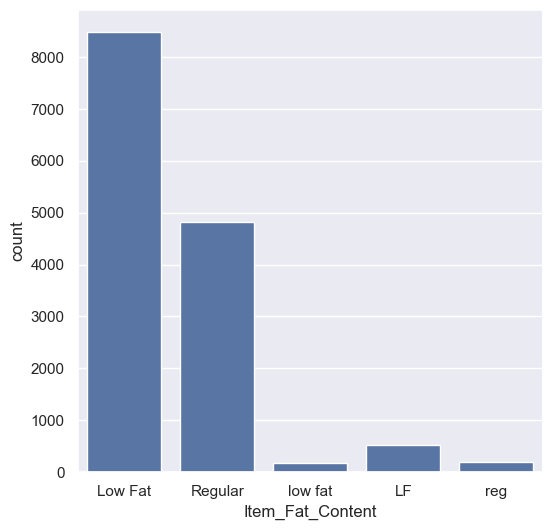

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=data)
plt.show()

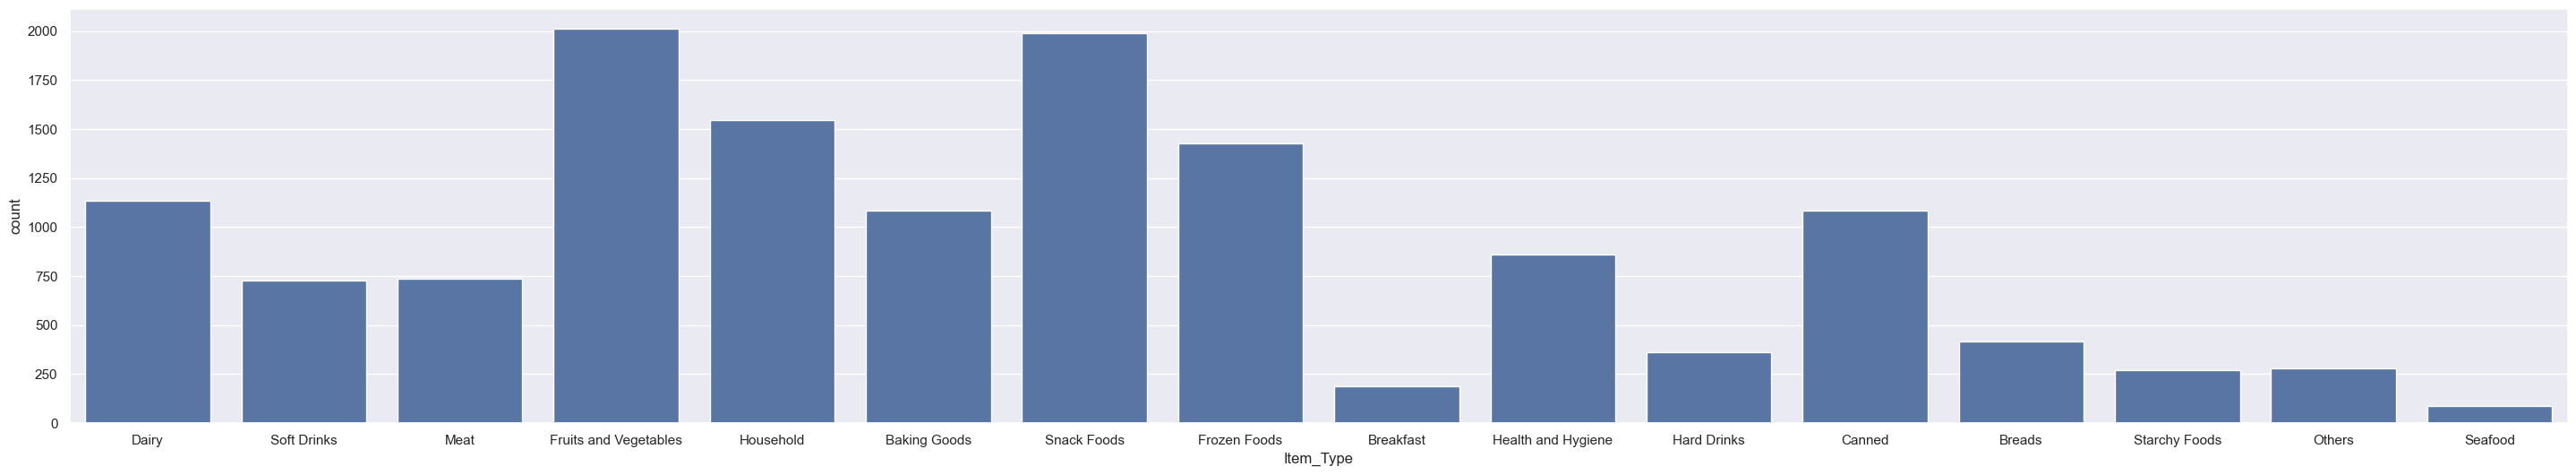

In [20]:
plt.figure(figsize=(36,6))
sns.countplot(x='Item_Type', data=data)
plt.show()

In [21]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [22]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

In [23]:
data.replace({'Item_Fat_Content' :{'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}},inplace = True)


In [24]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64

In [25]:
print(data['Outlet_Size'].apply(type).value_counts())


Outlet_Size
<class 'str'>                            10188
<class 'pandas.core.frame.DataFrame'>     4016
Name: count, dtype: int64


In [26]:
df_rows_with_df_objects = data[data['Outlet_Size'].apply(lambda x: isinstance(x, pd.DataFrame))]
print(df_rows_with_df_objects)


      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
3               FDX07       19.200          Regular         0.000000   
8               FDH17       16.200          Regular         0.016687   
9               FDU28       19.200          Regular         0.094450   
25              NCD06       13.000          Low Fat         0.099887   
28              FDE51        5.925          Regular         0.161467   
...               ...          ...              ...              ...   
14191           FDC44       15.600          Low Fat         0.288892   
14193           FDO03       10.395          Regular         0.037092   
14201           NCO17       10.000          Low Fat         0.073529   
14202           FDJ26       15.300          Regular         0.000000   
14203           FDU37        9.500          Regular         0.104720   

                   Item_Type  Item_MRP Outlet_Identifier  \
3      Fruits and Vegetables  182.0950            OUT010   
8              

In [27]:
# Convert all elements in 'Outlet_Size' to string, ignoring DataFrame objects
data['Outlet_Size'] = data['Outlet_Size'].apply(lambda x: str(x) if not isinstance(x, pd.DataFrame) else None)

# Check the cleaned data types
print(data['Outlet_Size'].apply(type).value_counts())

# Handle any remaining None values if needed
data['Outlet_Size'].fillna('Unknown', inplace=True)


Outlet_Size
<class 'str'>         10188
<class 'NoneType'>     4016
Name: count, dtype: int64


C:\Users\shifa\AppData\Local\Temp\ipykernel_7452\2341443401.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Outlet_Size'].fillna('Unknown', inplace=True)


In [28]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Outlet_Size'] = encoder.fit_transform(data['Outlet_Size'])


In [29]:
encoder = LabelEncoder()

In [30]:
data['Item_Identifier'] = encoder.fit_transform(data['Item_Identifier'])
data['Item_Fat_Content'] = encoder.fit_transform(data['Item_Fat_Content'])
data['Item_Type'] = encoder.fit_transform(data['Item_Type'])
data['Outlet_Identifier'] = encoder.fit_transform(data['Outlet_Identifier'])
data['Outlet_Size'] = encoder.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type'] = encoder.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type'] = encoder.fit_transform(data['Outlet_Type'])

In [31]:
X = data.drop(columns ='Item_Outlet_Sales',axis=1)
Y = data['Item_Outlet_Sales']

In [32]:
print(X)

       Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                  156         9.30                 0         0.016047   
1                    8         5.92                 1         0.019278   
2                  662        17.50                 0         0.016760   
3                 1121        19.20                 1         0.000000   
4                 1297         8.93                 0         0.000000   
...                ...          ...               ...              ...   
14199              233        10.50                 1         0.013496   
14200              308         7.60                 1         0.142991   
14201             1426        10.00                 0         0.073529   
14202              521        15.30                 1         0.000000   
14203              997         9.50                 1         0.104720   

       Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0              4  249.8092         

In [33]:
print(Y)

0        3735.138000
1         443.422800
2        2097.270000
3         732.380000
4         994.705200
            ...     
14199    2213.476465
14200    2349.547110
14201    1892.981544
14202    4533.564958
14203    1302.235520
Name: Item_Outlet_Sales, Length: 14204, dtype: float64


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

print(X.shape, X_train.shape, X_test.shape)

(14204, 11) (11363, 11) (2841, 11)


In [35]:
regressor = XGBRegressor()
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [36]:
# prediction 
training_data = regressor.predict(X_train)

In [37]:
# r squared value
r2_train = metrics.r2_score(Y_train, training_data)

print('R squared value:',r2_train)

R squared value: 0.8701234767930038


In [38]:
test_data = regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test, test_data)
print('R squared value:', r2_test)

R squared value: 0.6666492383314441
